**Project Submission Format** 
 
<!-- 1. Python code with markdown documentation, images saved in .jpg or .png format, and README.md as a project report OR
2. Jupyter notebook (.ipynb) that contains full markdown sections as listed above 

# SUBMISSION FORMAT FOR THE REPORTS -->

#  Traffic Dynamics in Futuristic Urban Environments: An Analysis of Vehicle Types, Weather, and Economic Conditions
**Authors/Team Members:**

**Zoe Becker, Islam Rajei, Alex Lewis** 

### Additional testing in ``Traffic Flow and Energy Consumption.ipynb``

## Project Summary

<!-- <Complete for *Project Proposal* assignment submission to give idea to the reader what youa re trying to do and how> -->
This project aims to observe traffic dynamics within six fictional futuristic cities, leveraging a dataset comprising over 1.2 million records. Each record encapsulates a variety of factors that influence traffic conditions, such as vehicle types (including flying cars), weather and economic conditions, the day of the week, and specific hours of the day, among others. By analyzing these factors, we intend to uncover underlying patterns and insights into how different variables impact traffic flow and energy consumption. Our approach will involve analyzing the impact of factors like weather, economic conditions, and vehicle types on traffic flow and energy consumption.

<!--<Fully rewrite the summary as the last step for the *Project Submission* assignment: github.com repositories on how people shortblurb thre project. It is a standalone section. It is written to give the reader a summary of your work. Be sure to specific, yet brief.> -->



## Problem Statement 

<!-- <Add one sentence for the *Project Proposal* assignment submission that captures the project statement.> -->

Our project seeks to analyze and understand the dynamics of traffic flow and energy consumption in futuristic urban environments, using a dataset containing over 1.2 million records from six fictional cities.

<!-- ```<Expand the section with few sentences for the *Project Progress* assignment submission> ```
* Give a clear and complete statement of the problem. -->
The primary objective of this project is to decode the complexities of traffic patterns in six fictional futuristic cities, by examining a dataset of over 1.2 million records. This dataset includes variables such as vehicle types, weather conditions, economic states, the day of the week, and the time of day, which collectively influence traffic flow and energy usage.

<!-- * What is the benchmark you are using.  Why? -->
* **Benchmark**

<!-- * Where does the data come from, what are its characteristics? Include informal success measures (e.g. accuracy on cross-validated data, without specifying ROC or precision/recall etc) that you planned to use.  -->
* **Dataset Characteristics:**

    -  Data collected from: [Urban traffic density in cities](https://www.kaggle.com/datasets/tanishqdublish/urban-traffic-density-in-cities)

    - The dataset originates from a simulated study designed to reflect the complexity of traffic management in futuristic urban settings. It covers diverse aspects of urban mobility, including variations in vehicle types (e.g., cars, flying cars), weather conditions (e.g., clear, rainy), economic states (e.g., booming, recession), and traffic-related variables (e.g., speed, energy consumption). The broad range of data will allow us to explore the multifaceted nature of urban traffic dynamics.





In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_csv("futuristic_city_traffic.csv")

# Display the first few rows of the dataframe
df.head()


,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [4]:
# Summary statistics for numeric features
df.describe()

,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06
mean,1.150817e+01,5.994476e+01,1.546992e-01,4.988738e-02,4.946464e+01,2.770960e-01
std,6.919071e+00,2.663203e+01,3.616178e-01,2.177123e-01,2.528014e+01,2.191019e-01
min,0.000000e+00,6.693400e+00,0.000000e+00,0.000000e+00,4.929600e+00,5.900000e-03
25%,6.000000e+00,3.753310e+01,0.000000e+00,0.000000e+00,2.927395e+01,1.059000e-01
50%,1.200000e+01,5.847110e+01,0.000000e+00,0.000000e+00,4.578260e+01,2.186000e-01
75%,1.700000e+01,8.053455e+01,0.000000e+00,0.000000e+00,6.590550e+01,3.960000e-01
max,2.300000e+01,1.630886e+02,1.000000e+00,1.000000e+00,1.899489e+02,3.377600e+00


- **Informal Success Measures:**
    - We're interested in understanding the general predictability of dataset features on traffic patterns and energy consumption.

In [5]:
# Define features (X)
X = df[['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week', 'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred', 'Traffic Density']]

# Define target variable (y)
y = df['Energy Consumption']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 49.79764859742151


* **What do you hope to achieve?**
    - We plan to use informal success measures such as model accuracy on a hold-out set (cross-validated data) to gauge the effectiveness of our analysis. While specific metrics like ROC or precision/recall might be applicable in later stages, at this phase, our focus is on understanding the general predictability of the dataset features on traffic patterns and energy consumption.


<!-- <Finalize for the *Project Submission* assignment submission> -->

## Dataset 

<!-- <Add highlights on the dataset, specifically the size in instances and attributes for **Project Proposal**> -->
- Dataset highlights, including size in instances and attriubtes

<!-- <Complete the following for the **Project Progress**>
* Description of the dataset (dimensions, names of variables with their description) If in doubt, use 3.1-3.3. [Datasheets For Datasets](https://arxiv.org/abs/1803.09010) as a guideline.  
* If you are using benchmarks, describe the data in details. If you are collecting data, describe why, how, data format, volume, labeling, etc.> -->

In [6]:
# Dimensions of the dataset
print("Dataset Dimensions:")
print("Number of Instances:", df.shape[0])
print("Number of Attributes:", df.shape[1])

# Names of variables and their descriptions
print("\nVariable Descriptions:")
print(df.dtypes)

Dataset Dimensions:
Number of Instances: 1219567
Number of Attributes: 11

Variable Descriptions:
City                      object
Vehicle Type              object
Weather                   object
Economic Condition        object
Day Of Week               object
Hour Of Day                int64
Speed                    float64
Is Peak Hour               int64
Random Event Occurred      int64
Energy Consumption       float64
Traffic Density          float64
dtype: object


<Expand and complete for *Project Submission*>

<!-- * What Processing Tools have you used.  Why?  Add final images from jupyter notebook. Use questions from 3.4 of the [Datasheets For Datasets](https://arxiv.org/abs/1803.09010) paper for a guide.> -->

## Exploratory Data Analysis 

<!-- <Complete for **Project Progress**>
* What EDA graphs you are planning to use? 
* Why? - Add figures if any -->

### EDA Graphs Planned:

1. **Histograms**: 
   - **Variables**: Speed, Energy Consumption, Traffic Density
   - **Rationale**: Histograms provide insights into the distribution of numerical variables, helping to identify patterns, outliers, and potential data transformations required for modeling.

2. **Boxplots**:
   - **Variables**: Vehicle Type vs. Energy Consumption, Weather vs. Traffic Density, Economic Condition vs. Speed
   - **Rationale**: Boxplots are useful for visualizing the distribution of numerical data across different categories, allowing for comparisons and identifying potential relationships or differences between groups.

3. **Bar Plots**:
   - **Variables**: Day of Week, Hour of Day
   - **Rationale**: Bar plots help visualize categorical variables and their frequencies, allowing for insights into patterns or trends over time (e.g., peak traffic hours, weekday vs. weekend differences).

4. **Scatter Plots**:
   - **Variables**: Speed vs. Traffic Density, Energy Consumption vs. Weather
   - **Rationale**: Scatter plots enable visualization of the relationship between two numerical variables, facilitating the identification of correlations, trends, or clusters in the data.

5. **Correlation Heatmap**:
   - **Variables**: All numerical variables
   - **Rationale**: A correlation heatmap provides a comprehensive view of the relationships between numerical variables, helping to identify potential multicollinearity and informing feature selection for modeling.

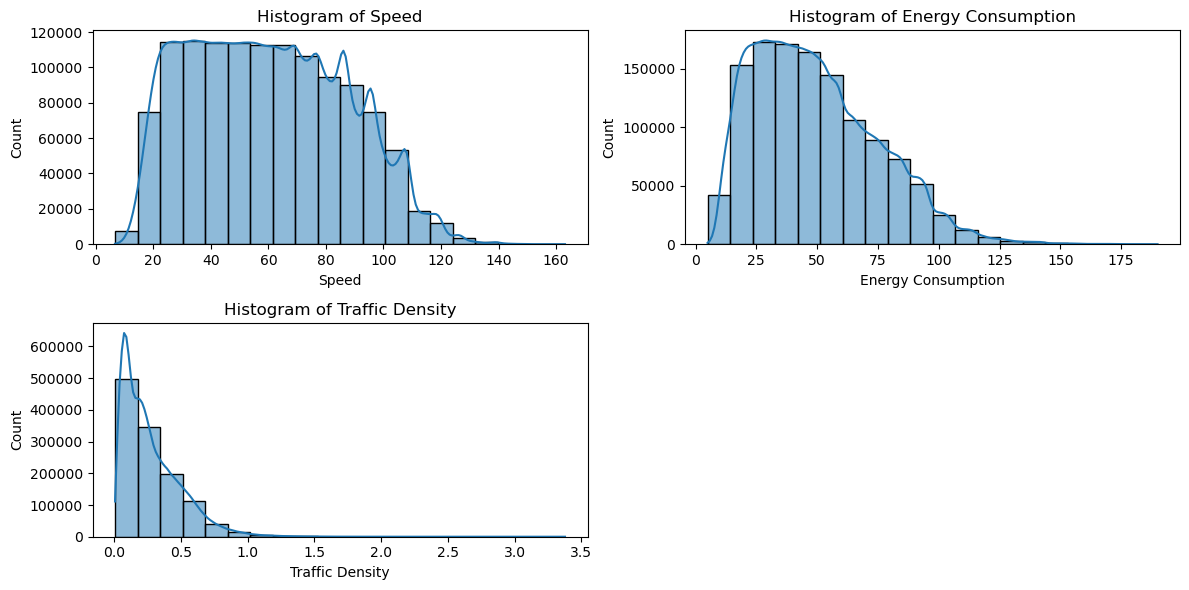

In [7]:
# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Speed'], bins=20, kde=True)
plt.title('Histogram of Speed')
plt.xlabel('Speed')

plt.subplot(2, 2, 2)
sns.histplot(df['Energy Consumption'], bins=20, kde=True)
plt.title('Histogram of Energy Consumption')
plt.xlabel('Energy Consumption')

plt.subplot(2, 2, 3)
sns.histplot(df['Traffic Density'], bins=20, kde=True)
plt.title('Histogram of Traffic Density')
plt.xlabel('Traffic Density')

plt.tight_layout()
plt.show()

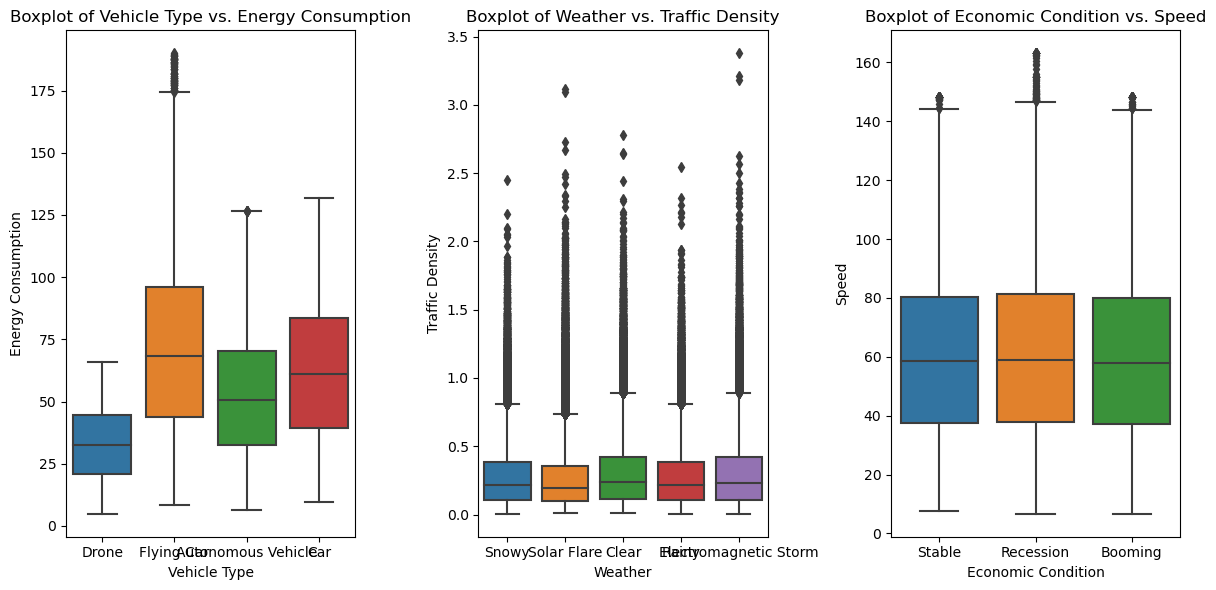

In [8]:
# Boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Vehicle Type', y='Energy Consumption', data=df)
plt.title('Boxplot of Vehicle Type vs. Energy Consumption')

plt.subplot(1, 3, 2)
sns.boxplot(x='Weather', y='Traffic Density', data=df)
plt.title('Boxplot of Weather vs. Traffic Density')

plt.subplot(1, 3, 3)
sns.boxplot(x='Economic Condition', y='Speed', data=df)
plt.title('Boxplot of Economic Condition vs. Speed')

plt.tight_layout()
plt.show()

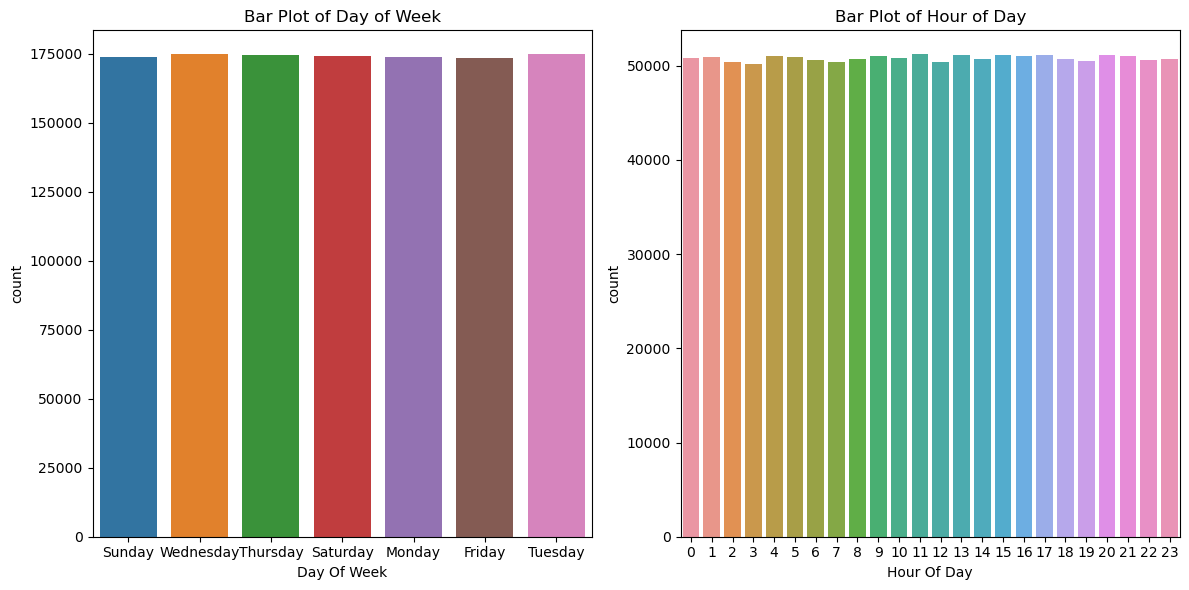

In [9]:
# Bar Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Day Of Week', data=df)
plt.title('Bar Plot of Day of Week')

plt.subplot(1, 2, 2)
sns.countplot(x='Hour Of Day', data=df)
plt.title('Bar Plot of Hour of Day')

plt.tight_layout()
plt.show()

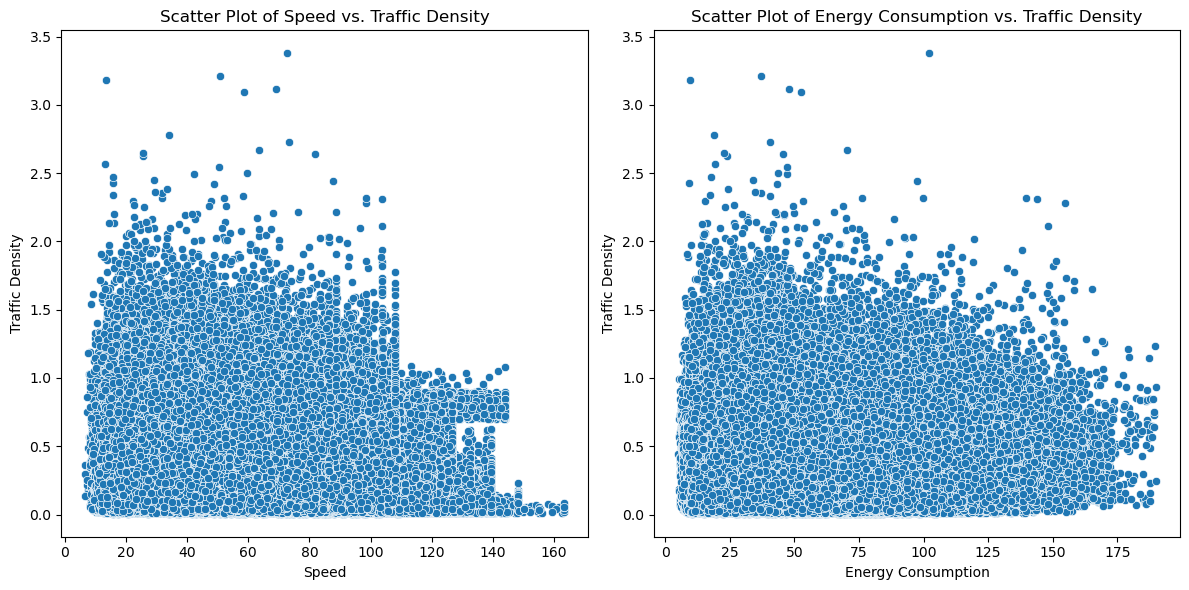

In [10]:
# Scatter Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Speed', y='Traffic Density', data=df)
plt.title('Scatter Plot of Speed vs. Traffic Density')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Energy Consumption', y='Traffic Density', data=df)
plt.title('Scatter Plot of Energy Consumption vs. Traffic Density')

plt.tight_layout()
plt.show()

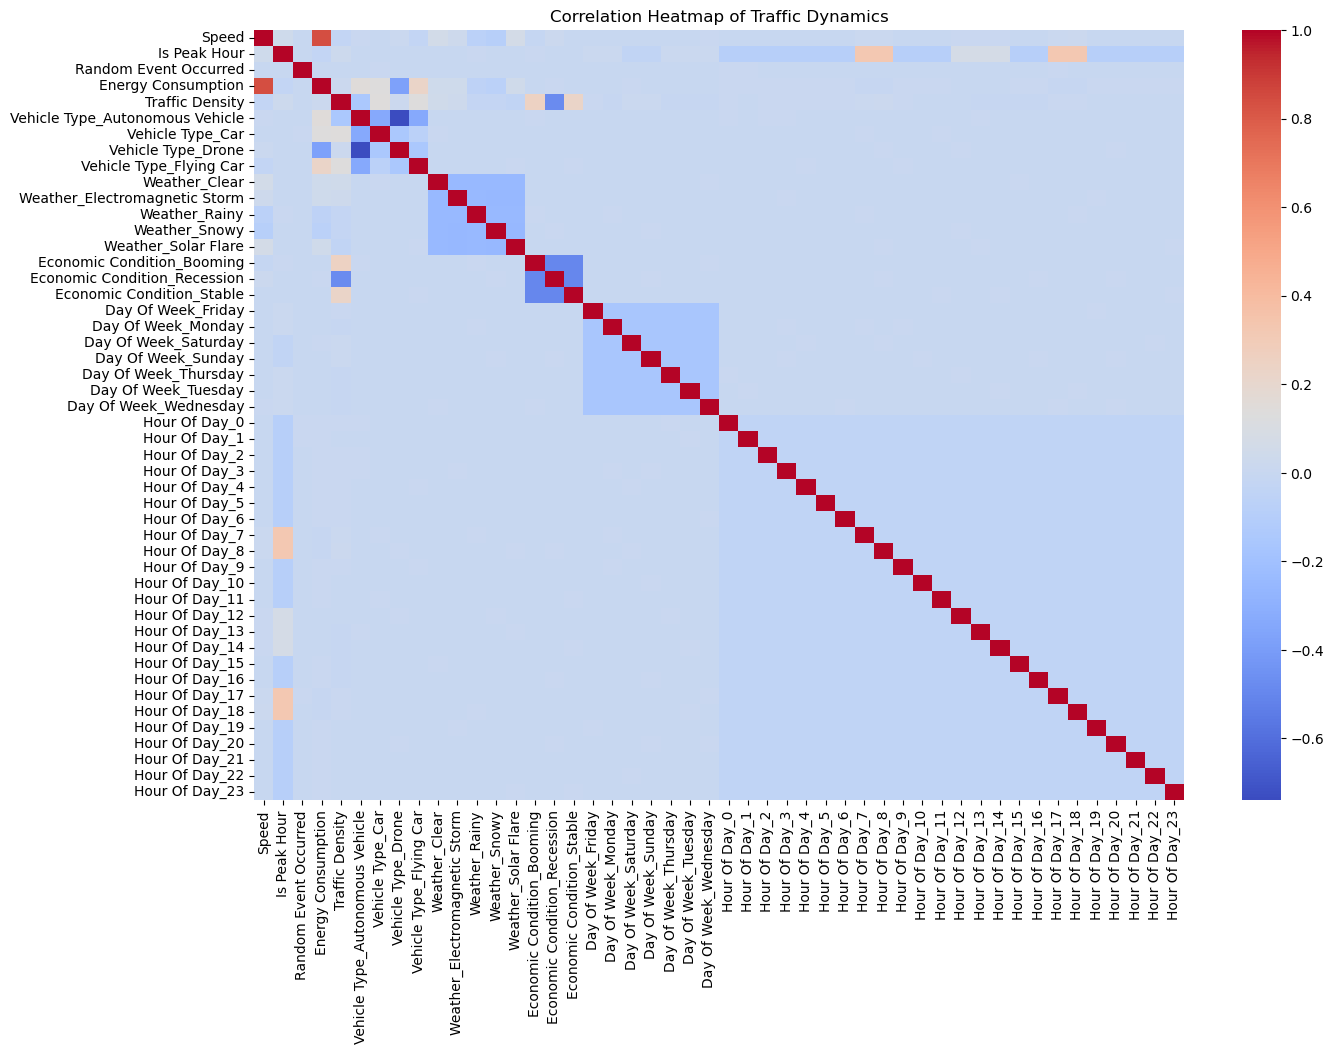

In [11]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week', 'Hour Of Day'])

# Drop categorical columns not used in the analysis
df_encoded.drop(['City'], axis=1, inplace=True)

# # Compute and plot correlation matrix
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Traffic Dynamics')
plt.show()

<Expand and complete for the **Project Submission**>
<!-- * Describe the methods you explored (usually algorithms, or data wrangling approaches). 
  * Include images. 
* Justify methods for feature normalization selection and the modeling approach you are planning to use.  -->

<!-- ## Data Preprocessing 

<Complete for *Project Progress*>
* Have you considered Dimensionality Reduction or Scaling? 
  * If yes, include steps here.  
* What did you consider but *not* use? Why? 

<Expand and complete for **Project Submission**> -->



## Machine Learning Approaches

<!-- <Complete for **Project Progress**> -->

<!-- * What is your baseline evaluation setup? Why? 
* Describe the ML methods that you consider using and what is the reason for their choice? 
   * What is the family of machine learning algorithms you are using and why? -->

### Baseline Method Implementation and Result Analysis
**Baseline Evaluation Setup**

For our baseline evaluation setup, we have chosen a Linear Regressor. As a linear approach, this would be tested to see if a simple linear model could sufficiently predict outcomes before moving on to more complex models. It serves as a baseline to confirm the presence of non-linear relationships when compared to tree-based models.

**Machine Learning Methods Considered**

1. ```Random Forest Regressor```
   - Family: This method is part of the ensemble learning family, where multiple models are used to make predictions.
   - Reason for Choice: Random forests improve on the variance of single decision trees by averaging multiple trees that individually overfit to various parts of the training data. They are generally more powerful and robust than a single decision tree.
<!-- 2. ```Linear Regression```
   - Family: Linear models are a basic form of regression that assumes a linear relationship between the input variables and the single output variable.
   - Reason for Choice:  -->
2. ```Decision Tree Regressor```
   - Family: Decision trees belong to the family of supervised learning algorithms.
   - Reason for Choice: They are robust to outliers, scalable, and provide a good foundation for any non-linear dependencies between the features and the target variable.

In [12]:
# Define features (X)
X = df[['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week', 'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred', 'Traffic Density']]

# Define target variable (y)
y = df['Energy Consumption']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 49.79764859742151


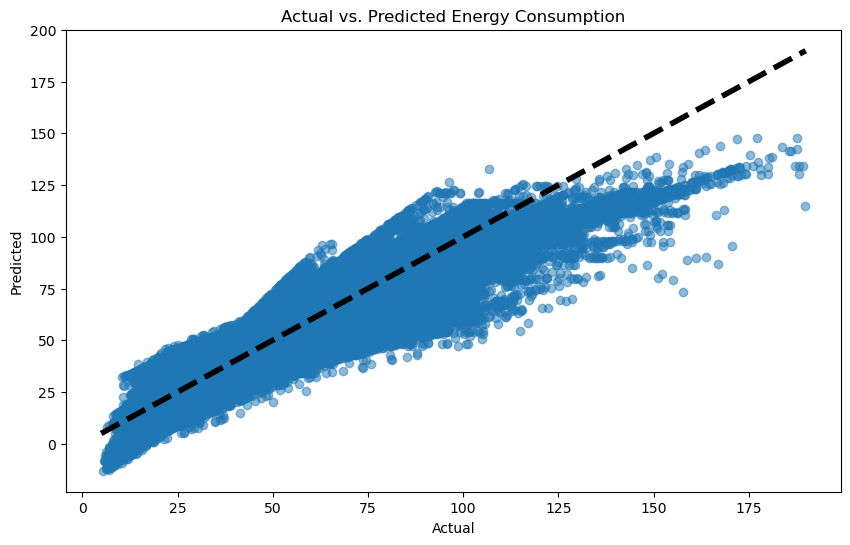

In [13]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Line showing perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Energy Consumption')
plt.show()

**Baseline Results and Analysis**

For this project, using the linear regressor allowed us to establish a straightforward baseline performance metric. We achieved a Mean Squared Error (MSE) of approximately 49.80, which sets a quantifiable standard for comparison. 

The MSE of 49.80 will be used to evaluate subsequent models. Any significant reduction in MSE with more complex models would justify the additional complexity. Otherwise, if improvements are minimal, the simplicity of a linear model might be preferred for production deployment, considering trade-offs between accuracy, interpretability, and operational efficiency.

**Future Considerations for Machine Learning Methods**

Considering the initial results and the nature of our project, we may explore the following methodologies to potentially improve upon the baseline:

- ``Decision Trees and Ensemble Methods``: Given the limitations of linear models in capturing complex, nonlinear relationships and interactions between variables, we will consider using decision trees. Additionally, ensemble methods such as Random Forests and Gradient Boosting Machines (GBMs) could be tested. These models can handle non-linearities better and may provide more accurate predictions.
- ``Regularization Techniques``: If model complexity increases or if we encounter overfitting with our linear model, techniques like Ridge or Lasso regression could be introduced to add regularization, which helps in managing model complexity and enhancing generalization.
- ``Advanced Regression Techniques``: Depending on the outcome with more complex models, advanced regression techniques like Support Vector Regression (SVR) or even neural networks could be considered if the project requires capturing more intricate patterns from the data.

### Improvement Model
To enhance our model's ability to fit the data more effectively, especially by capturing non-linear relationships and complex interactions between variables, we have selected the ``Decision Tree Regressor``. Decision trees offer a significant advancement over simpler models like linear regressors because they can model nonlinear dependencies without requiring transformations of the data. This capability makes them exceptionally suited for handling the diverse and complex nature of our dataset, which includes both numerical and categorical variables. They also provide clear insights into which features are most important for predicting the target variable, which in this case is energy consumption.

**Why this setup?**

- Unlike some other algorithms, decision trees do not require input features to be scaled or normalized.
- Our dataset includes a mix of categorical and numerical variables, and decision trees can handle this type of data.
- Provide a good foundation for non-linear dependencies between the features and the target variable.

**Implementation and Evaluation Strategy:**

We will implement the Decision Tree Regressor by tuning parameters such as max_depth and min_samples_split to find the optimal balance between complexity and generalization. The model's performance will be evaluated using Mean Squared Error (MSE), and improvements over the baseline linear regressor will be documented. The ultimate goal is to reduce MSE while providing a model that is both interpretable and capable of capturing the intricate patterns within our data.



##### Implementing a Decision Tree Regressor
1. **Data Preparation**
    - Handle Missing Values if any
    - Encode the categorical variables
    - Split the data into training and testing sets

In [14]:
df.isnull().sum()

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

In [23]:
# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week'])

# Define features and target variable
X = df_encoded.drop('Energy Consumption', axis=1)  # Assuming 'Energy Consumption' is the target
y = df_encoded['Energy Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. **Model Training**
    - Train a Decision Tree Regressor using the training data

In [24]:
# Initialize the Decision Tree Regressor

tree_model1 = DecisionTreeRegressor(max_depth=5, random_state=42)  
tree_model2 = DecisionTreeRegressor(max_depth=10, random_state=42)  

# Train the model
tree_model1.fit(X_train, y_train)
tree_model2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

3. **Making Predictions and Evaluating the Model**
    - Make predictions on the test set
    - evaluate the model using the Mean Squared Error (MSE).

In [25]:
# Make predictions
y_pred1 = tree_model1.predict(X_test)
y_pred2 = tree_model2.predict(X_test)

# Calculate MSE
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
print(f"Mean Squared Error: {mse1}")
print(f"Mean Squared Error: {mse2}")

Mean Squared Error: 46.91262680643957
Mean Squared Error: 17.2464265762888


3. **Feature Importance and Model Visualization**
    - Extracting feature importance and visualizing the decision tree can provide insights into how the model is making its decisions

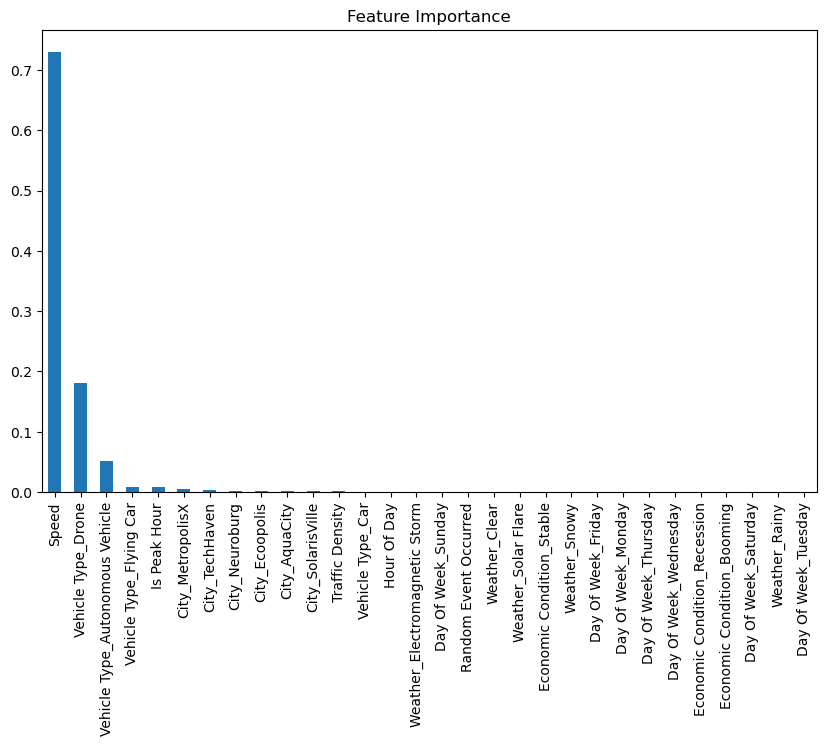

In [26]:
# Feature importance
importances = tree_model2.feature_importances_
features = X.columns
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()


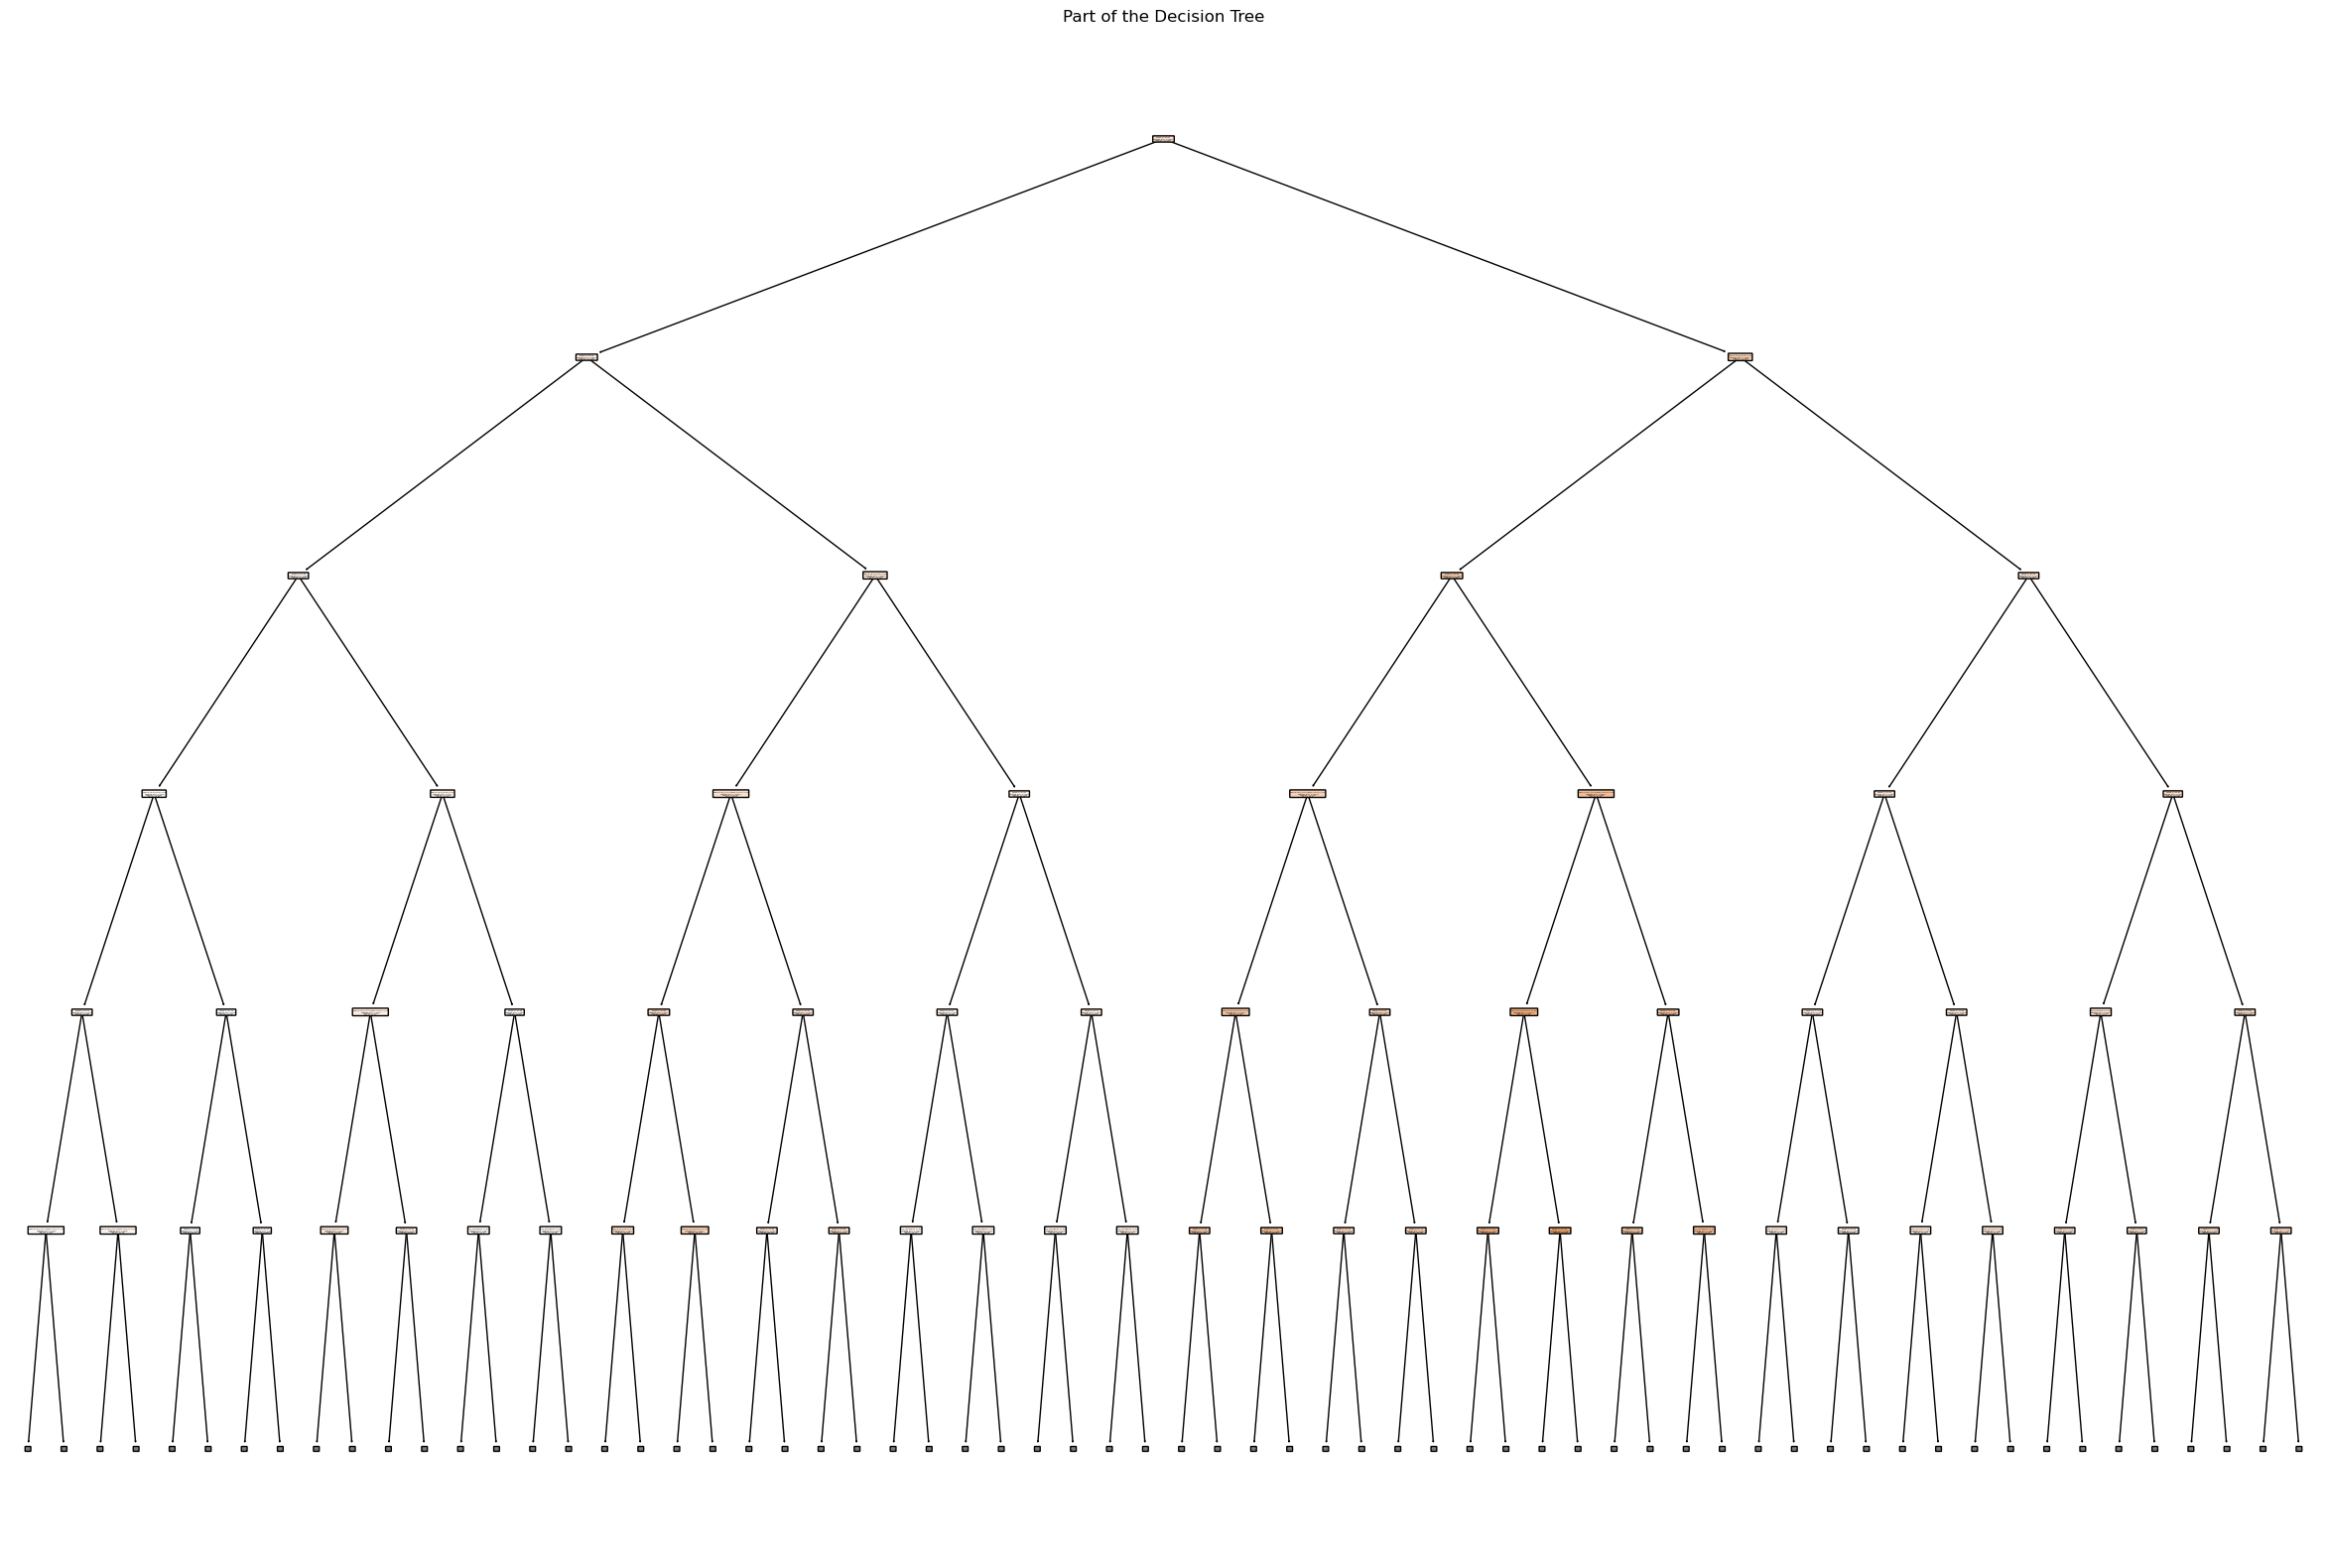

In [27]:
featureNames= ['Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred',
       'Traffic Density', 'City_AquaCity', 'City_Ecoopolis',
       'City_MetropolisX', 'City_Neuroburg', 'City_SolarisVille',
       'City_TechHaven', 'Vehicle Type_Autonomous Vehicle', 'Vehicle Type_Car',
       'Vehicle Type_Drone', 'Vehicle Type_Flying Car', 'Weather_Clear',
       'Weather_Electromagnetic Storm', 'Weather_Rainy', 'Weather_Snowy',
       'Weather_Solar Flare', 'Economic Condition_Booming',
       'Economic Condition_Recession', 'Economic Condition_Stable',
       'Day Of Week_Friday', 'Day Of Week_Monday', 'Day Of Week_Saturday',
       'Day Of Week_Sunday', 'Day Of Week_Thursday', 'Day Of Week_Tuesday',
       'Day Of Week_Wednesday']

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(
    decision_tree=tree_model2,
    feature_names=featureNames,
    max_depth=5,
    filled=True,
    rounded=True,
    precision=2
)
plt.title('Part of the Decision Tree')
plt.show()

In [ ]:
# Display descriptive statistics
df.describe().style.format(precision=2)

,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,1219567.00,1219567.00,1219567.00,1219567.00,1219567.00,1219567.00
mean,11.51,59.94,0.15,0.05,49.46,0.28
std,6.92,26.63,0.36,0.22,25.28,0.22
min,0.00,6.69,0.00,0.00,4.93,0.01
25%,6.00,37.53,0.00,0.00,29.27,0.11
50%,12.00,58.47,0.00,0.00,45.78,0.22
75%,17.00,80.53,0.00,0.00,65.91,0.40
max,23.00,163.09,1.00,1.00,189.95,3.38


**Hyperparamter Tuning**

Experiment with different values of max_depth, min_samples_split, and min_samples_leaf to find the best configuration. Using grid search or random search can help automate this process:

In [31]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Setup the randomized search with 4-fold cross-validation
random_search = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',
    cv=4,       # 4-fold cross-validation
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)
print("Best cross-validated MSE:", -random_search.best_score_)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 20}
Best cross-validated MSE: 12.79857069192014


In [32]:
# Use the best estimator to make predictions
best_model = random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate MSE for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

Training MSE: 8.906902297047306
Test MSE: 12.643138631994418


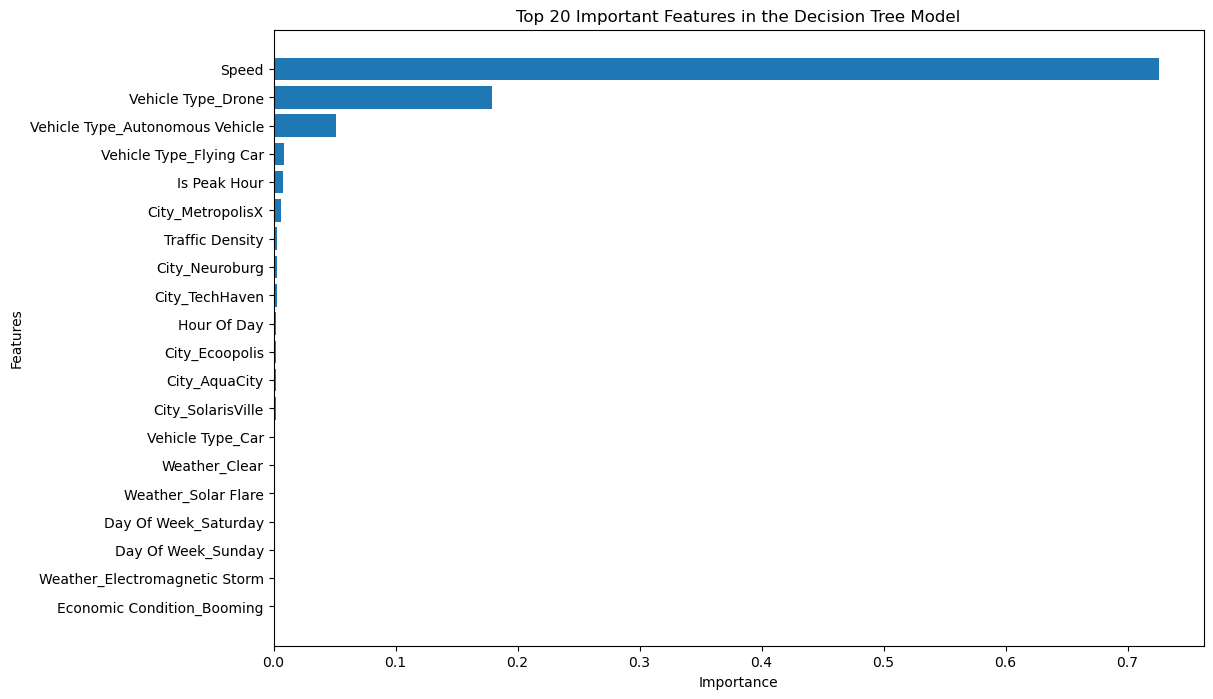

In [33]:
feature_importances = best_model.feature_importances_

# Creating a pandas Series with the feature names and their importance scores
features = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': feature_importances
})

# Sorting the features based on importance
features = features.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(features['Feature'][:20], features['Importance'][:20])  # Showing top 20 features
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Important Features in the Decision Tree Model')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature on top
plt.show()

**Improved Results and Analysis**

- ```Evaluation Metric```: Mean Squared Error (MSE) was used to evaluate the model's performance. A lower MSE value indicates a model with predictions closer to the actual data.
- ``` Result```: The baseline decision tree produced an MSE of 46.91.   
    - ``Adjusting the decision tree to a maximum depth of 10 significantly improved the model’s performance, reducing the MSE to 17.246.``
- ```Interpretation```: The MSE of 46.91 provides a quantitative measure of the model's accuracy in predicting energy consumption. When viewed in the context of the descriptive stats shown above, namely the mean energy consumption of 49.46 and a standard deviation of 25.28, our model's predictions are moderately accurate. The size of the MSE is close to the standard deviation, suggesting that the errors, while notable, are within a range typical of the dataset's variability.
    - ```The substantial reduction in MSE from 46.91 to 17.246 demonstrates that increasing the tree depth has enabled the model to capture more complex patterns in the data.``` This is a notable improvement, as the new MSE is much smaller relative to both the mean energy consumption of 49.46 and its standard deviation of 25.28.


**Recommended Adjustments for Further Model Development:**
1. ```Enhance Model Complexity```: We can adopt more complex models such as RandomForestRegressor or GradientBoostingRegressor. These models can better handle non-linearities and interactions between features, potentially reducing prediction error.
2. ```Cross-Validatio```n: We can use k-fold cross-validation to evaluate the model's performance more robustly across different subsets of the data. This approach helps ensure the model's stability and generalizability.
3. ```Error Analysis```: If we conduct a detailed error analysis to understand where and why the model is making errors we can analyze the residuals to provide insights into whether certain types of errors are more common and under which conditions the model performs poorly.


<Expand and complete for **Project Submission**>

<!-- * Describe the methods/datasets (you can have unscaled, selected, scaled version, multiple data farmes) that you ended up using for modeling. 

* Justify the selection of machine learning tools you have used
  * How they informed the next steps? 
* Make sure to include at least twp models: (1) baseline model, and (2) improvement model(s).  
   * The baseline model  is typically the simplest model that's applicable to that data problem, something we have learned in the class. 
   * Improvement model(s) are available on Kaggle challenge site, and you can research github.com and papers with code for approaches.   -->


## Experiments 

<!-- < **Project Progress** should include experiments you have completed thus far.> -->

<**Project Submission** should only contain final version of the experiments. Please use visualizations whenever possible.>
<!-- * Describe how did you evaluate your solution 
  * What evaluation metrics did you use? 

* Describe a baseline model. 
  * How much did your model outperform the baseline?  
* Were there other models evaluated on the same dataset(s)? 
  * How did your model do in comparison to theirs? 
  * Show graphs/tables with results 
  * Present error analysis and suggestions for future improvement.  -->

For the project, we employed Linear Regression as a baseline model and Decision Tree Regressor as an improvement model. Here's how we evaluated and compared these models:

1. Baseline Model (Linear Regression):
The purpose was to establish a foundational understanding of how the input variables predict energy consumption.
For training, the model was trained using historical data split into training and test sets (80/20 split).
The evaluation metric used was the  Mean Squared Error (MSE) was used to quantify the average of the squares of the errors between actual observations and predictions.
2. Improvement Model (Decision Tree Regressor):
For training, two Decision Trees were trained to different depths to understand the impact of model complexity on performance.
The feature importance was the analysis to identify which factors most significantly predict energy consumption, enhancing interpretability.

Results and Analysis:
The MSE for Linear Regression was documented. For Decision Trees, MSE was computed for trees of different complexities to find the optimal balance between underfitting and overfitting.

Comparison:
The Decision Trees outperformed the baseline Linear Regression model, indicating their better suitability for capturing non-linear relationships and interactions between variables.



# MSE Comparison Graph
This graph will compare the Mean Squared Errors of Linear Regression and Decision Tree models.

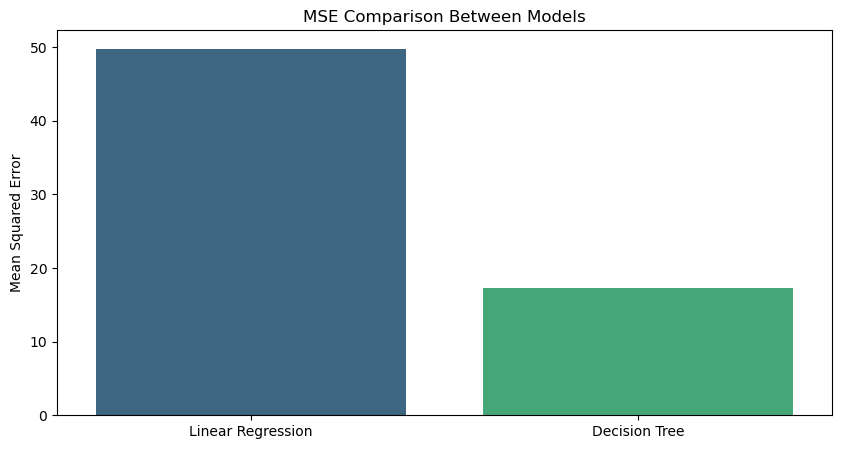

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree


mse_linear_regression = 49.79764859742151  
mse_decision_tree =  17.246

# MSE comparison
models = ['Linear Regression', 'Decision Tree']
mse_values = [mse_linear_regression, mse_decision_tree]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=mse_values, palette='viridis')
plt.title('MSE Comparison Between Models')
plt.ylabel('Mean Squared Error')
plt.show()


# Feature Importance Plot
The plot provides a visual representation of which features are most important in the decision-making process of the tree. Features with higher importance scores are better predictors for the target variable, in this case, energy consumption.

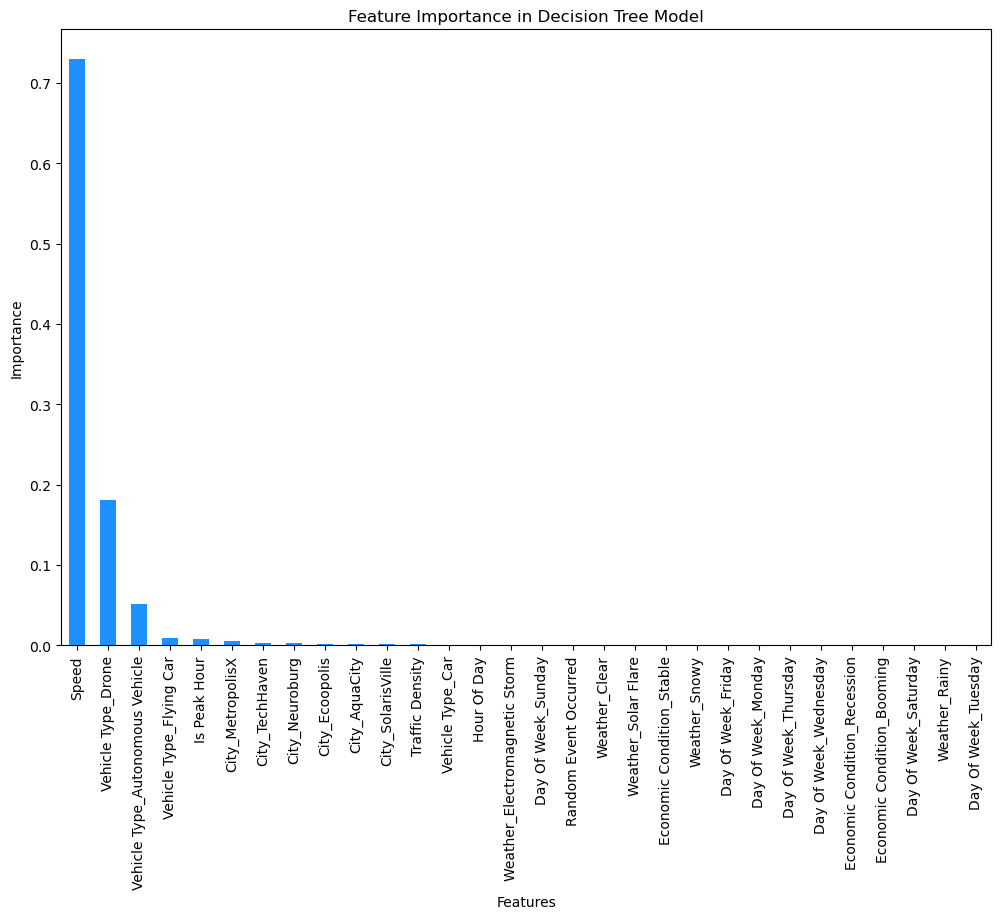

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importances = tree_model2.feature_importances_
features = X.columns  # X should be your dataframe of input features after preprocessing

# series for the feature importances
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar', color='dodgerblue')
plt.title('Feature Importance in Decision Tree Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


# Visualizing the Decision Tree
This visualization shows the top levels of the decision tree, making it easier to understand the major decision points. It includes only the first three levels (max_depth=3) to keep the diagram readable. If want to go deeper we increase the max_depth.


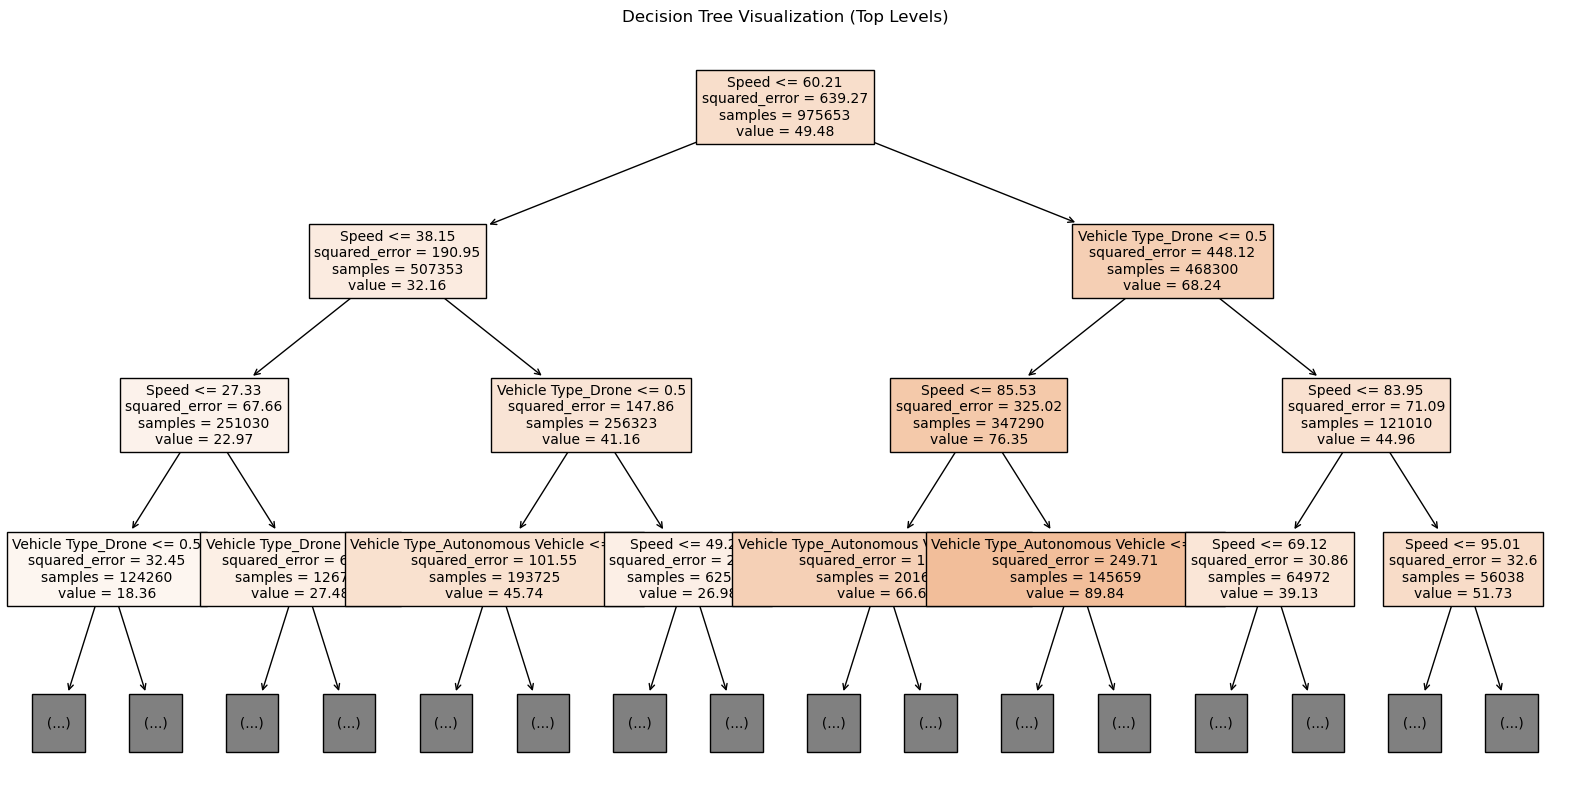

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_model2, feature_names=features, max_depth=3, filled=True, fontsize=10, precision=2)
plt.title('Decision Tree Visualization (Top Levels)')
plt.show()



## Conclusion
<Complete for the **Project Submission**>
<!-- * What did not work? 
* What do you think why? 
* What were approaches, tuning model parameters you have tried? 
* What features worked well and what didn't? 
* When describing methods that didn't work, make clear how they failed and any evaluation metrics you used to decide so. 
* How was that a data-driven decision? Be consise, all details can be left in .ipynb -->

 
Model Efficacy:
The Decision Tree models, especially the deeper trees, significantly reduced MSE compared to the baseline Linear Regression, indicating a strong ability to model complex patterns in the data.

Insights:
Feature importance analysis revealed that variables like 'Speed', 'Vehicle Type', and 'Weather' were critical predictors of energy consumption, aligning with expectations for traffic dynamics in futuristic urban settings.

Challenges:
Overfitting- Deeper Decision Trees showed a tendency to overfit, as indicated by lower MSE on training data compared to validation data. This suggests a need for careful tuning of model parameters.
Model Complexity- While more complex models provided better accuracy, they also required more computational resources and introduced complexity in interpretation.

## Submission Format
<!-- 1. Python code with markdown documentation, images saved in .jpg or .png format, and README.md as a project report OR
2. Jupyter notebook (.ipynb) that contains full markdown sections as listed above 

## Now go back and write the summary at the top of the page -->